## Importing the necessary libraries for the  data cleaning and the visualisation
# I will mark the matplotlib library as inline so as to produce a visualization output on the cell itself

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [2]:
#Reading the data and storing it as a DataFrame using a variable "df"

df = pd.read_csv("data\kc_house_data.csv")

In [3]:
# Confirming the info of all the columns in the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
# Finding out whether there are missing values in the DataFrame
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# dropping unecessary columns

df_dropped = df.drop(columns=['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'])
display(df_dropped)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004,47.5345,-122.069


In [7]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [8]:
df_dropped.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

# In the following cell i will replace the  missing values of the "waterfront" with the mode thats "0.0"
# I will then print the head of the Dataframe to confirm that the change has taken effect

In [9]:
df_dropped.waterfront.fillna(0, inplace=True)
display(df_dropped.head())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,47.6168,-122.045


In [10]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
 10  lat          21597 non-null  float64
 11  long         21597 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 2.0 MB


In [11]:
df_dropped.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

### In the cells below i will import the important libraries for the statistical analysis and interactive visualization especiallly done by the "seaborn" library.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### I will the write a for loop for the visualisation of the graphs of correlation of every column factor against the price factor pon the y-axis

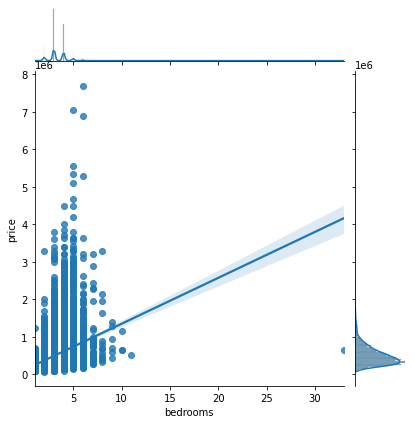

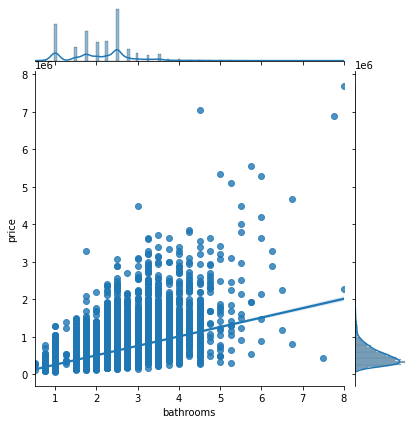

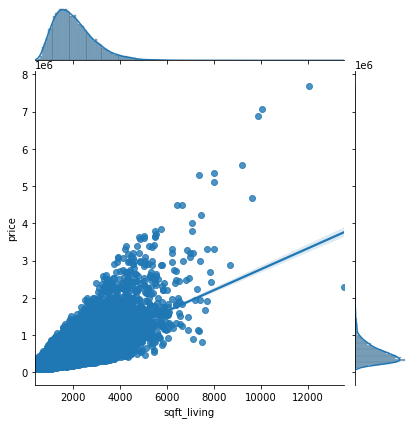

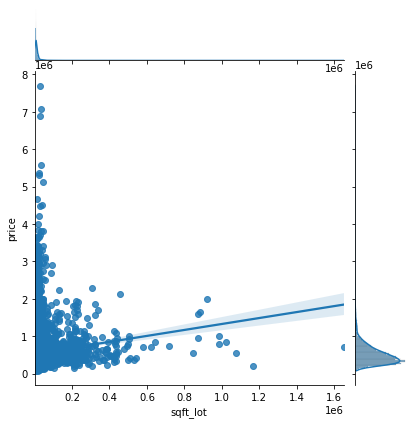

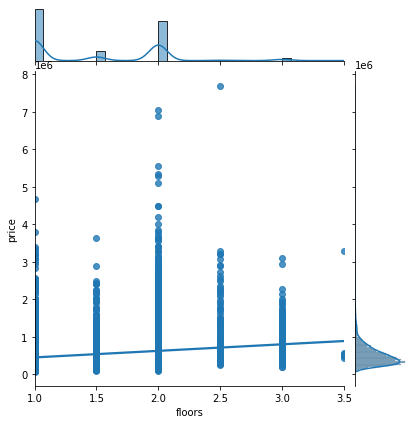

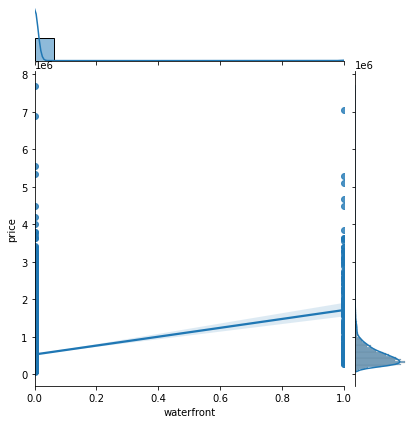

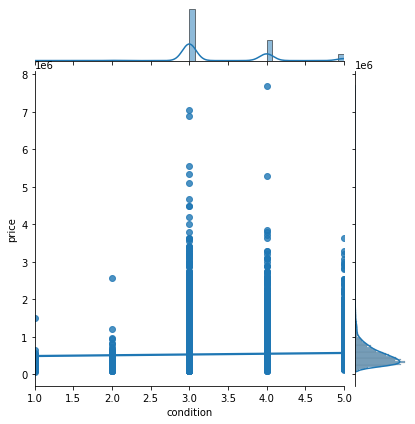

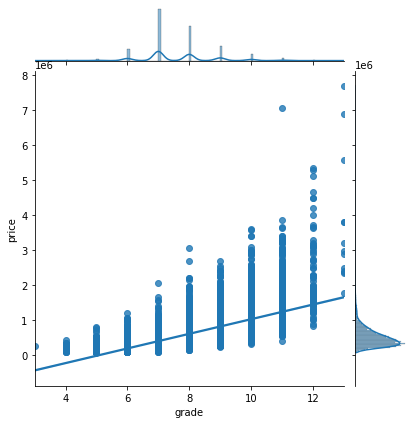

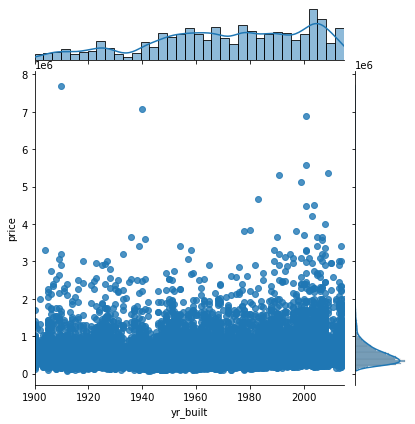

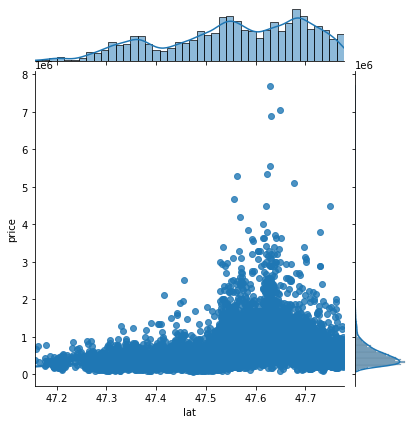

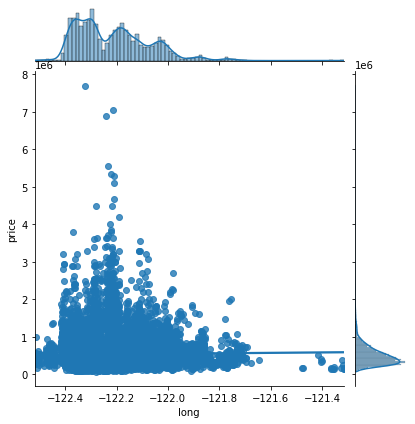

In [13]:
for col_name in df_dropped.columns[1:]:
    ax = sns.jointplot(x=col_name, y='price', data=df_dropped, kind='reg');
    

From the above illustration grade and sqft_living have the highest impact on price

In [14]:
# in this cell i will print the ouput of all the column labels minus the price labe
outcome = 'price'
x_cols = list(df_dropped.columns)
x_cols.remove(outcome)
print(x_cols)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'lat', 'long']


In [15]:
predictors = sm.add_constant(df_dropped.drop('price',1))
model_6 = sm.OLS(df_dropped.price, predictors).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     4262.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:59:00   Log-Likelihood:            -2.9493e+05
No. Observations:               21597   AIC:                         5.899e+05
Df Residuals:                   21585   BIC:                         5.900e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.361e+07   1.53e+06    -22.030      0.000   -3.66e+07   -3.06e+07
bedrooms    -3.824e+04   1936.229    -19.752      0.000    -4.2e+04   -3.44e+04
bathrooms    4.339e+04   3268.215     13.277      0.000     3.7e+04    4.98e+04
sqft_living   186.6282      3.148     59.277      0.000     180.457     192.799
sqft_lot       -0.0170      0.036     -0.477      0.633      -0.087       0.053
floors       8519.0784   3278.245      2.599      0.009    2093.476    1.49e+04
waterfront   7.811e+05   1.74e+04     45.022      0.000    7.47e+05    8.15e+05
condition    2.754e+04   2353.301     11.703      0.000    2.29e+04    3.22e+04
grade        1.123e+05   2064.069     54.412      0.000    1.08e+05    1.16e+05
yr_built    -2798.0620     69.646    -40.175      0.000   -2934.574   -2661.550
lat          5.353e+05   1.06e+04     50.379      0.000    5.14e+05    5.56e+05
long        -1.054e+05   1.15e+04     -9.196      0.000   -1.28e+05   -8.29e+04
==============================================================================
Omnibus:                    17960.242   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1564758.969
Skew:                           3.486   Prob(JB):                         0.00
Kurtosis:                      44.113   Cond. No.                     4.79e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
PRICE = np.log(df_dropped.price)
PRICE = pd.DataFrame(PRICE)

X1= df_dropped.drop('price', 1)
y1= PRICE

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2)

In [18]:
#normalization
for col in x_cols:
    X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
display(X_train.head())
print(len(X_train), len(X_test))

<ipython-input-18-c934d189158c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,lat,long
9935,0.674685,0.496114,0.775343,-0.053554,0.936335,-0.084675,-0.623381,0.29035,1.016847,1.287610,1.755362
9802,2.821376,3.095566,1.964854,-0.141456,0.936335,-0.084675,-0.623381,0.29035,0.267404,0.726001,0.543537
13729,-0.398661,0.496114,0.191402,-0.164544,0.936335,-0.084675,-0.623381,0.29035,1.119044,-1.929400,-1.015536
19966,-1.472006,0.171183,-0.998109,-0.332054,0.936335,-0.084675,-0.623381,0.29035,1.187175,0.434397,-0.618681
6057,-0.398661,-0.803611,-0.781834,-0.313560,0.936335,-0.084675,-0.623381,-0.56046,-0.890826,0.624479,-1.299004


17277 4320


## In the cell below i will use the ols regression and will the print the regression results as the output

In [19]:
predictors = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, predictors).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     4816.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:59:00   Log-Likelihood:                -1323.8
No. Observations:               17277   AIC:                             2672.
Df Residuals:                   17265   BIC:                             2765.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.0485      0.002   6563.042      0.000      13.045      13.052
bedrooms       -0.0138      0.003     -5.450      0.000      -0.019      -0.009
bathrooms       0.0569      0.004     16.052      0.000       0.050       0.064
sqft_living     0.1733      0.004     42.480      0.000       0.165       0.181
sqft_lot        0.0132      0.002      6.348      0.000       0.009       0.017
floors          0.0302      0.003     12.024      0.000       0.025       0.035
waterfront      0.0493      0.002     24.469      0.000       0.045       0.053
condition       0.0401      0.002     18.574      0.000       0.036       0.044
grade           0.2206      0.003     64.546      0.000       0.214       0.227
yr_built       -0.1072      0.003    -37.200      0.000      -0.113      -0.102
lat             0.1846      0.002     88.651      0.000       0.181       0.189
long           -0.0030      0.002     -1.296      0.195      -0.007       0.002
==============================================================================
Omnibus:                      414.872   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              932.043
Skew:                           0.085   Prob(JB):                    4.07e-203
Kurtosis:                       4.125   Cond. No.                         4.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

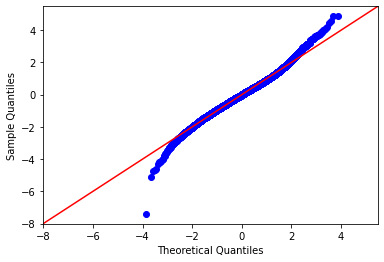

In [20]:
## In this cell i will do a visualisation to determine the relationship
## of the sample quantiles and the Theoritical quantiles

fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line='45', fit=True)

In [21]:
regression = LinearRegression()
regression.fit(X_train, y_train)

#use the regression for the train and test data
y_hat_train = regression.predict(X_train)
y_hat_test = regression.predict(X_test)

#Root Mean Square Error
train_rmse = np.sqrt(mean_squared_error(y_train, y_hat_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_hat_test))

print(f'Train Root Mean Square Error: {train_rmse}')
print(f'Test Root Mean Square Error: {test_rmse}')

Train Root Mean Square Error: 0.2612392541483978
Test Root Mean Square Error: 645.1628854802767


Model 2

<AxesSubplot:>

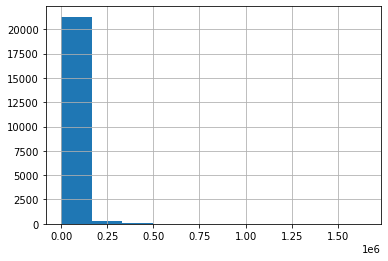

In [45]:
# An histogram of the distribution of the "Square foot lot"

df_dropped.sqft_lot.hist()

<AxesSubplot:>

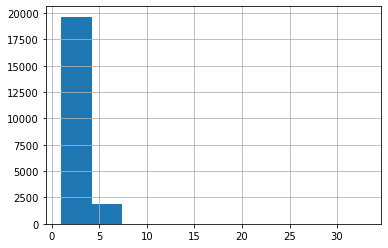

In [46]:
# visualization of the distribution of the bedrooms using anhistogram

df_dropped.bedrooms.hist()

In [47]:
# Calculating and printing the percentiles of the squarefoot lot
# from the 80th percentile to the 100th percentile


for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.sqft_lot.quantile(q=q)))

0.8 percentile: 12182.399999999998
0.81 percentile: 12558.0
0.82 percentile: 13055.439999999995
0.83 percentile: 13503.68
0.84 percentile: 14197.0
0.85 percentile: 15000.0
0.86 percentile: 15716.040000000012
0.87 percentile: 16646.640000000003
0.88 percentile: 18000.0
0.89 percentile: 19550.0
0.9 percentile: 21371.600000000006
0.91 percentile: 24149.360000000015
0.92 percentile: 28505.119999999995
0.93 percentile: 34848.0
0.94 percentile: 37643.19999999999
0.95 percentile: 43307.200000000026
0.96 percentile: 50655.28
0.97 percentile: 67381.7199999999
0.98 percentile: 107157.0
0.99 percentile: 213008.0


In [48]:
# calculating and printing the percentile of the "bedrooms"
# from the 80th to the 100th percentile


for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q,df_dropped.bedrooms.quantile(q=q)))

0.8 percentile: 4.0
0.81 percentile: 4.0
0.82 percentile: 4.0
0.83 percentile: 4.0
0.84 percentile: 4.0
0.85 percentile: 4.0
0.86 percentile: 4.0
0.87 percentile: 4.0
0.88 percentile: 4.0
0.89 percentile: 4.0
0.9 percentile: 4.0
0.91 percentile: 4.0
0.92 percentile: 5.0
0.93 percentile: 5.0
0.94 percentile: 5.0
0.95 percentile: 5.0
0.96 percentile: 5.0
0.97 percentile: 5.0
0.98 percentile: 5.0
0.99 percentile: 6.0


## In the next cells I will try and remove/ flashout the outliers and the print the ratio of removed outliers to 1

In [26]:
original = len(df_dropped)
df_outlier_filter = df_dropped.copy()
df_outlier_filters = df_outlier_filter[df_outlier_filter.sqft_lot < 100000] # Subsetting to remove extreme outliers
print('Percent removed sqft_lot:', (original -len(df_outlier_filters))/original)

df_outlier_filters = df_outlier_filters[df_outlier_filters.bedrooms < 7] # Subsetting to remove extreme outliers
print('Percent removed bedrooms:', (original -len(df_outlier_filters))/original)

df_outlier_filter['price'] = np.log(df_outlier_filter['price'])

Percent removed sqft_lot: 0.021530768162244755
Percent removed bedrooms: 0.024355234523313424


In [50]:
 # perfoming the regression of the model and printing out the results
X2 = df_outlier_filter.drop('price', 1)
y2 = df_outlier_filter['price']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

predictors = sm.add_constant(X_train2)
model_2 = sm.OLS(y_train2, predictors).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     4758.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:06:52   Log-Likelihood:                -1419.5
No. Observations:               17277   AIC:                             2863.
Df Residuals:                   17265   BIC:                             2956.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -39.9028      2.337    -17.075      0.000     -44.483     -35.322
bedrooms       -0.0592      0.009     -6.578      0.000      -0.077      -0.042
bathrooms       0.0760      0.005     16.228      0.000       0.067       0.085
sqft_living     0.0002   4.62e-06     41.388      0.000       0.000       0.000
sqft_lot       -0.0109      0.003     -3.777      0.000      -0.017      -0.005
floors          0.0430      0.005      8.663      0.000       0.033       0.053
waterfront      0.5884      0.025     23.474      0.000       0.539       0.638
condition       0.0653      0.003     19.442      0.000       0.059       0.072
grade           0.1914      0.003     65.445      0.000       0.186       0.197
yr_built       -0.0038   9.93e-05    -37.970      0.000      -0.004      -0.004
lat             1.3226      0.015     86.688      0.000       1.293       1.352
long            0.0382      0.017      2.199      0.028       0.004       0.072
==============================================================================
Omnibus:                      428.160   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              964.810
Skew:                           0.096   Prob(JB):                    3.12e-210
Kurtosis:                       4.142   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

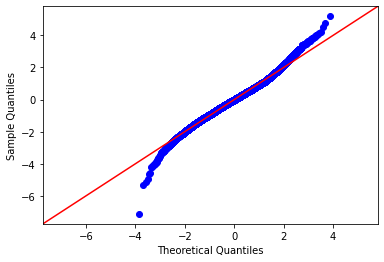

In [51]:
# correlation visualisation between the sample quatile 
# and the Theoritical Quantiles

fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

In [29]:
regression2 = LinearRegression()
regression2.fit(X_train2, y_train2)

#use the regression for the train and test data
y_hat_train2 = regression2.predict(X_train2)
y_hat_test2 = regression2.predict(X_test2)

#Root Mean Square Error
train_rmse2 = np.sqrt(mean_squared_error(y_train2, y_hat_train2))
test_rmse2 = np.sqrt(mean_squared_error(y_test2, y_hat_test2))

print(f'Train Root Mean Square Error: {train_rmse2}')
print(f'Test Root Mean Square Error: {test_rmse2}')

Train Root Mean Square Error: 0.26185430622848505
Test Root Mean Square Error: 0.25980360757949755


Model 3

In [30]:
our_variables = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition', 'grade', 'yr_built']
corr = df_dropped[our_variables].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.026496,0.356563,0.155670
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,-0.126479,0.665838,0.507173
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,-0.059445,0.762779,0.318152
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,-0.008830,0.114731,0.052946
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,-0.264075,0.458794,0.489193
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.016648,0.082818,-0.024487
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,1.000000,-0.146896,-0.361592
grade,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,-0.146896,1.000000,0.447865
yr_built,0.155670,0.507173,0.318152,0.052946,0.489193,-0.024487,-0.361592,0.447865,1.000000


<AxesSubplot:>

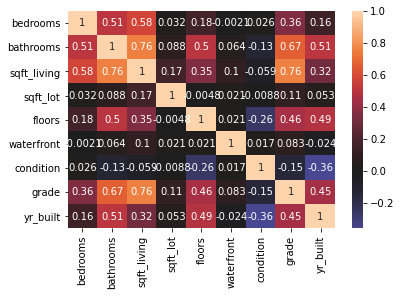

In [52]:
# Heatmap showing the correlation behaviors

sns.heatmap(corr, center=0,annot = True)

In [32]:
X3 = df_outlier_filter.drop(columns=['price','grade','bathrooms'], axis=1)
y3 = df_outlier_filter['price']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train3)
model_3 = sm.OLS(y_train3, predictors).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     4218.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:59:06   Log-Likelihood:                -3430.9
No. Observations:               17277   AIC:                             6882.
Df Residuals:                   17267   BIC:                             6959.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -67.9729      2.407    -28.235      0.000     -72.692     -63.254
bedrooms       -0.0344      0.003    -11.515      0.000      -0.040      -0.029
sqft_living     0.0004   3.32e-06    119.498      0.000       0.000       0.000
sqft_lot     3.127e-07   5.99e-08      5.216      0.000    1.95e-07     4.3e-07
floors          0.1207      0.005     24.083      0.000       0.111       0.131
waterfront      0.6251      0.027     22.854      0.000       0.572       0.679
condition       0.0693      0.004     18.418      0.000       0.062       0.077
yr_built       -0.0016      0.000    -15.801      0.000      -0.002      -0.001
lat             1.4937      0.017     89.042      0.000       1.461       1.527
long           -0.0984      0.018     -5.389      0.000      -0.134      -0.063
==============================================================================
Omnibus:                      591.269   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1699.468
Skew:                          -0.036   Prob(JB):                         0.00
Kurtosis:                       4.535   Cond. No.                     4.50e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

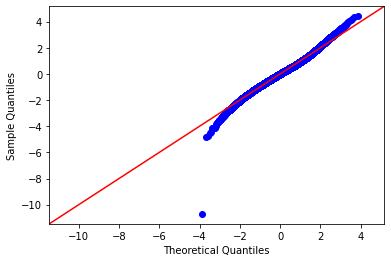

In [54]:
# Visualisation
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

In [34]:
regression3 = LinearRegression()
regression3.fit(X_train3, y_train3)

#use the regression for the train and test data
y_hat_train3 = regression3.predict(X_train3)
y_hat_test3 = regression3.predict(X_test3)

#Root Mean Square Error
train_rmse3 = np.sqrt(mean_squared_error(y_train3, y_hat_train3))
test_rmse3 = np.sqrt(mean_squared_error(y_test3, y_hat_test3))

print(f'Train Root Mean Square Error: {train_rmse3}')
print(f'Test Root Mean Square Error: {test_rmse3}')

Train Root Mean Square Error: 0.2951249792613258
Test Root Mean Square Error: 0.28849426807465134


### I will the use a diffent model to compare the aproach of the resuls

In [55]:
# In this cell i will use a for loop across all the columns
# to print the skewness of each and every column

for col_name in df_outlier_filter.columns[1:]:
    print(col_name)
    print(df_outlier_filter[col_name].skew())

bedrooms
-0.6805637280656164
bathrooms
0.5197092816403838
sqft_living
1.473215455425834
sqft_lot
0.9625003856495555
floors
0.6144969756263127
waterfront
12.039584643829357
condition
1.0360374245132955
grade
0.7882366363846076
yr_built
-0.4694499764949978
lat
-0.4855215900022569
long
0.884888339492564


In [56]:
# I will then calculate and print out the skewness
# of the "squarefoot lot" column 
df_outlier_filter['sqft_lot'] = np.log(df_outlier_filter['sqft_lot'])
df_outlier_filter['sqft_lot'].skew()

0.3428914744575032

<AxesSubplot:>

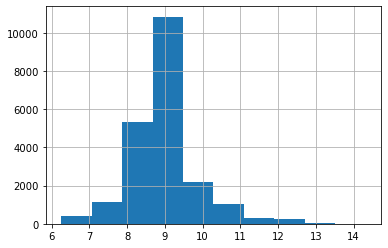

In [37]:
df_outlier_filter['sqft_lot'].hist()

In [38]:
df_outlier_filter['bedrooms'] = np.log(df_outlier_filter['bedrooms'])
df_outlier_filter['bedrooms'].skew()

-0.6805637280656164

In [39]:
X4 = df_outlier_filter.drop(columns=['price'], axis=1)
y4 = df_outlier_filter['price']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2)

# Refit model with subset features
predictors = sm.add_constant(X_train4)
model_4 = sm.OLS(y_train4, predictors).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     4797.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:59:07   Log-Likelihood:                -1398.6
No. Observations:               17277   AIC:                             2821.
Df Residuals:                   17265   BIC:                             2914.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -40.3491      2.315    -17.426      0.000     -44.888     -35.811
bedrooms       -0.0572      0.009     -6.402      0.000      -0.075      -0.040
bathrooms       0.0723      0.005     15.540      0.000       0.063       0.081
sqft_living     0.0002   4.63e-06     42.908      0.000       0.000       0.000
sqft_lot       -0.0094      0.003     -3.266      0.001      -0.015      -0.004
floors          0.0496      0.005     10.041      0.000       0.040       0.059
waterfront      0.5793      0.024     23.998      0.000       0.532       0.627
condition       0.0661      0.003     19.763      0.000       0.060       0.073
grade           0.1885      0.003     64.400      0.000       0.183       0.194
yr_built       -0.0038   9.86e-05    -38.592      0.000      -0.004      -0.004
lat             1.3280      0.015     87.076      0.000       1.298       1.358
long            0.0362      0.017      2.102      0.036       0.002       0.070
==============================================================================
Omnibus:                      413.617   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              910.664
Skew:                           0.099   Prob(JB):                    1.79e-198
Kurtosis:                       4.107   Cond. No.                     3.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

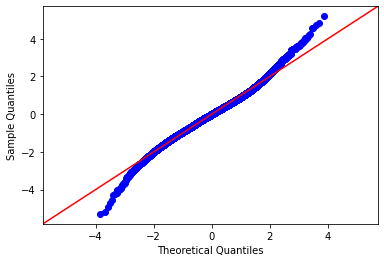

In [40]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

In [41]:
regression4 = LinearRegression()
regression4.fit(X_train4, y_train4)

#use the regression for the train and test data
y_hat_train4 = regression4.predict(X_train4)
y_hat_test4 = regression4.predict(X_test4)

#Root Mean Square Error
train_rmse4 = np.sqrt(mean_squared_error(y_train4, y_hat_train4))
test_rmse4 = np.sqrt(mean_squared_error(y_test4, y_hat_test4))

print(f'Train Root Mean Square Error: {train_rmse4}')
print(f'Test Root Mean Square Error: {test_rmse4}')

Train Root Mean Square Error: 0.2623732830391563
Test Root Mean Square Error: 0.25934067076461015


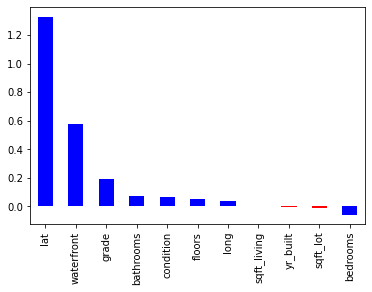

In [42]:
model_4.params[1:].sort_values(ascending=False).plot.bar(color=['blue','blue','blue','blue','blue','blue','blue','red','red','red']);

In [43]:
X_final = df_outlier_filter.drop(columns=['price'], axis=1)
y_final = df_outlier_filter['price']

predictors = sm.add_constant(X_final)
model_final = sm.OLS(y_final, predictors).fit()
model_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     5979.
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:59:08   Log-Likelihood:                -1696.6
No. Observations:               21597   AIC:                             3417.
Df Residuals:                   21585   BIC:                             3513.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -39.8191      2.071    -19.228      0.000     -43.878     -35.760
bedrooms       -0.0540      0.008     -6.758      0.000      -0.070      -0.038
bathrooms       0.0726      0.004     17.397      0.000       0.064       0.081
sqft_living     0.0002   4.12e-06     47.166      0.000       0.000       0.000
sqft_lot       -0.0093      0.003     -3.647      0.000      -0.014      -0.004
floors          0.0473      0.004     10.707      0.000       0.039       0.056
waterfront      0.5879      0.022     26.651      0.000       0.545       0.631
condition       0.0631      0.003     21.093      0.000       0.057       0.069
grade           0.1899      0.003     72.756      0.000       0.185       0.195
yr_built       -0.0038   8.85e-05    -42.708      0.000      -0.004      -0.004
lat             1.3200      0.014     96.941      0.000       1.293       1.347
long            0.0378      0.015      2.457      0.014       0.008       0.068
==============================================================================
Omnibus:                      520.394   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1161.834
Skew:                           0.093   Prob(JB):                    5.14e-253
Kurtosis:                       4.121   Cond. No.                     3.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
regression_final = LinearRegression()
regression_final.fit(X_final, y_final)

y_hat_final = regression_final.predict(X_final)
rmse_final = np.sqrt(mean_squared_error(y_final, y_hat_final))

print(f'Test Root Mean Square Error: {rmse_final}')

Test Root Mean Square Error: 0.2617462810244703
